<a href="https://colab.research.google.com/github/NJena404/Deep-Learning-ANN-Costmer-churn-prediction/blob/main/DeepLearning_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#!pip install tensorflow-gpu

In [18]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [19]:
#Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
x=df.iloc[:,3:13]
y=df.iloc[:,-1]

In [22]:
#Independent feature
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [23]:
#Independent feature
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [24]:
#Feature Engineering
x=pd.get_dummies(x,columns=['Geography','Gender'],drop_first=True)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [25]:
#Splitting the data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [30]:
x_train.shape

(8000, 11)

In [26]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

**Creating of ANN model**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout

In [28]:
#Initializing ANN
classifier=Sequential()

In [31]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu')) #Units=11 bcz we have 11 columns in the data set


In [32]:
#Adding the hidden layer
classifier.add(Dense(units=7,activation='relu'))  #1st hidden layer
classifier.add(Dense(units=6,activation='relu'))  #2nd hidden layer

In [33]:
#Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [34]:
#Compile the ANN model
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
#Early stopping
from keras.callbacks import EarlyStopping
early_stopping= EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [36]:
#Training model
history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 7s 6ms/step - loss: 0.4856 - accuracy: 0.7946 - val_loss: 0.4481 - val_accuracy: 0.7974
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4329 - accuracy: 0.8044 - val_loss: 0.4337 - val_accuracy: 0.8065
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4200 - accuracy: 0.8160 - val_loss: 0.4272 - val_accuracy: 0.8126
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4114 - accuracy: 0.8265 - val_loss: 0.4224 - val_accuracy: 0.8118
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4012 - accuracy: 0.8315 - val_loss: 0.4123 - val_accuracy: 0.8209
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3867 - accuracy: 0.8377 - val_loss: 0.3937 - val_accuracy: 0.8342
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3680 - accuracy: 0.8496 - val_loss: 0.3796 - val_accuracy:

In [38]:
#Model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 7)                 84        
                                                                 
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

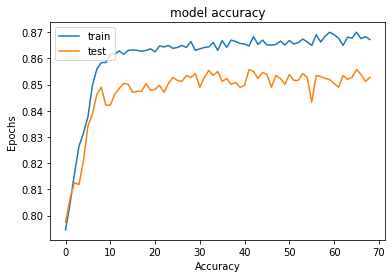

In [41]:
#Summerizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

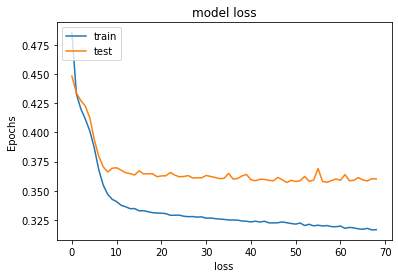

In [43]:
#Summerizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [44]:
#Predicting model
y_pred=classifier.predict(x_test)
y_pred=(y_pred >= 0.5)

In [45]:
#Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1520,   75],
       [ 203,  202]])

In [47]:
#Calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.861

In [49]:
#Get the weights from model
classifier.get_weights()

[array([[ 2.77498394e-01, -1.04848526e-01,  1.00734197e-01,
          1.64793283e-01,  3.91950235e-02,  4.85663563e-01,
         -2.29699582e-01, -1.76672824e-02,  2.52328724e-01,
          2.96118230e-01,  7.19407052e-02],
        [-6.38293087e-01, -5.82422078e-01,  6.92119479e-01,
         -6.20298386e-01, -8.91618252e-01, -9.39101458e-01,
          3.79413933e-01,  2.31301170e-02,  5.29024839e-01,
         -1.13901429e-01, -3.53809632e-02],
        [ 2.37893179e-01, -2.28828609e-01,  1.68225929e-01,
         -1.82979390e-01,  8.14512894e-02, -2.73096412e-01,
         -2.32755840e-01, -3.24852049e-01,  6.75069764e-02,
          1.49843199e-02, -2.78351605e-01],
        [-9.88381386e-01,  1.84994653e-01, -6.82389513e-02,
         -1.88989908e-01, -5.29069593e-03,  3.32657039e-01,
         -3.96387279e-01, -7.13595748e-02, -2.33430862e-01,
         -2.39333615e-01, -3.14158499e-01],
        [-1.11261517e-01,  1.97788724e-03,  3.49186242e-01,
         -8.63880478e-03, -4.44504768e-02,  

**THANK YOU**